# Анализ данных пользователей сервиса аренды самокатов GoFast.

**Описание проекта:** В современном мире городской мобильности сервисы аренды самокатов становятся всё более популярными. GoFast — один из таких сервисов, предоставляющий пользователям возможность арендовать самокаты через мобильное приложение. Для улучшения бизнес-показателей и повышения удовлетворённости клиентов необходимо проанализировать данные о пользователях и их поездках. В рамках данного проекта мы изучим данные из нескольких городов, чтобы выявить ключевые факторы, влияющие на использование сервиса, и проверить гипотезы, которые могут способствовать росту бизнеса.

**Цель исследования:** Анализ данных пользователей и поездок для выявления ключевых факторов, влияющих на использование сервиса GoFast, и проверка гипотез, направленных на улучшение бизнес-показателей.

**Ход исследования:**

- **Подготовка данных:** Загрузка и изучение общей информации из предоставленного датасета.
- **Предобработка данных:** Обработка пропущенных значений, корректировка типов данных, устранение дубликатов и других аномалий.
- **Анализ данных:** Изучение основных параметров пользователей и поездок, их распределения, зависимости использования сервиса от различных характеристик, а также проверка гипотез.
- **Проверка гипотез:** Анализ влияния подписки Ultra на частоту и стоимость поездок, сравнение поведения пользователей с подпиской и без неё.

**Общий вывод:** Резюмирование полученных результатов, формулировка ключевых выводов и рекомендаций для улучшения бизнес-показателей сервиса GoFast.

С помощью данного исследования мы стремимся предоставить всесторонний анализ использования сервиса аренды самокатов, что станет основой для дальнейших улучшений и разработки стратегий роста бизнеса.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

## Шаг 1. Загрузка данных

##### Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы. Выведем первые строки каждого набора данных.

In [2]:
users_data = pd.read_csv('/datasets/users_go.csv')
users_data.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [3]:
rides_data = pd.read_csv('/datasets/rides_go.csv')
rides_data.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [4]:
subs_data = pd.read_csv('/datasets/subscriptions_go.csv')
subs_data.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


##### Изучим общую информацию о каждом датафрейме.

In [5]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [6]:
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
subs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Как видно, данные целые и без пропусков.

## Шаг 2. Предобработка данных

### Приведем столбец date к типу даты pandas.

In [8]:
rides_data['date'] = pd.to_datetime(rides_data['date'])
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


### Создадим новый столбец с номером месяца на основе столбца date.

In [9]:
rides_data['month'] = rides_data['date'].dt.month
rides_data.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


### Проверим наличие пропущенных значений и дубликатов в датафреймах. Обработаем их, если такие значения присутствуют.

In [10]:
users_miss = users_data.isnull().sum()
print(users_miss)
print()
rides_miss = rides_data.isnull().sum()
print(rides_miss)
print()
subs_miss = subs_data.isnull().sum()
print(subs_miss)

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


Как видим, пропущенных значений в датафреймах нет.

Теперь проверим дубликаты:

In [11]:
users_dups = users_data.duplicated().sum()
print('Дубликатов в датафрейме users_data: ', users_dups)
rides_dups = rides_data.duplicated().sum()
print('Дубликатов в датафрейме rides_data: ', rides_dups)
subs_dups = subs_data.duplicated().sum()
print('Дубликатов в датафрейме subs_data: ', subs_dups)


Дубликатов в датафрейме users_data:  31
Дубликатов в датафрейме rides_data:  0
Дубликатов в датафрейме subs_data:  0


Можем поближе посмотреть строки с дубликатами:

In [12]:
users_data[users_data.duplicated()]

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


Удалим дубликаты и сбросим индексы.

In [13]:
users_data = users_data.drop_duplicates()
users_data.reset_index(drop=True, inplace=True)
users_data.duplicated().sum()

0

<b>Промежуточный итог:</b> Данные оказались целыми и без пропусков, но имелись дубликаты в данных с информацией о пользователях, в кол-ве 31шт. Избавился от дубликатов. Привел столбец в датой к нужному типу данных, и добавил столбец с месяцем. Данные готовы для перехода к следующему этапу.

## Шаг 3. Исследовательский анализ данных

На данном этапе, будем описывать и визуализировать общую информацию о пользователях и поездках. В частности:
- частоту встречаемости городов;
- соотношение пользователей с подпиской и без подписки;
- возраст пользователей;
- расстояние, которое пользователь преодолел за одну поездку;
- продолжительность поездок.

### Частота встречаемости городов;

In [14]:
city_counts = users_data['city'].value_counts()
city_counts

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

Построим график:

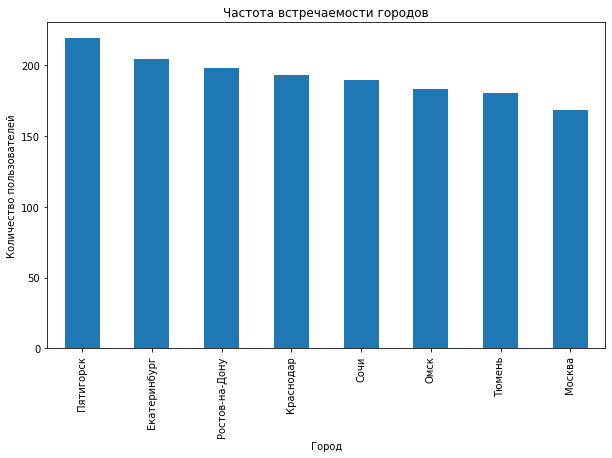

In [15]:
city_counts.plot(
    kind='bar', 
    figsize = (10,6), 
    title = 'Частота встречаемости городов',
    ylabel = 'Количество пользователей',
    xlabel = 'Город'
)
plt.show()

Видно, что чаще всего в данных встречается г. Пятигорск. Москва же находится на последнем месте по частоте встречаемости.

### Соотношение пользователей с подпиской и без подписки;

In [16]:
subs_counts = users_data['subscription_type'].value_counts()
subs_counts

free     835
ultra    699
Name: subscription_type, dtype: int64

Построим круговую диаграмму:

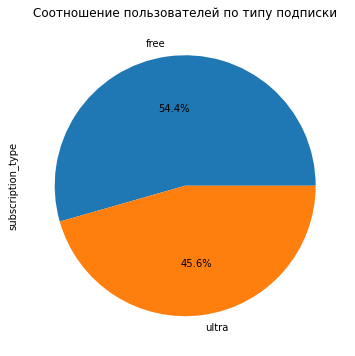

In [17]:
subs_counts.plot(
    kind='pie', 
    figsize = (10,6), 
    title ='Соотношение пользователей по типу подписки', 
    autopct='%1.1f%%'
) # очень хотелось процентики на пироге, потому последний аргумент пришлось погуглить :)
plt.show()

Видно, что количество пользователей без подписки превышает кол-во подписчиков на 5%.

### Возраст пользователей;

Воспользуемся методом describe() для получения статистики по столбцу age, который содержит данные о возрасте пользователей.

In [18]:
ages = users_data['age']
ages.describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Построим диаграмму размаха:

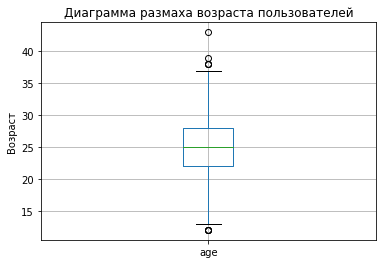

In [19]:
users_data.boxplot('age')
plt.title('Диаграмма размаха возраста пользователей')
plt.ylabel('Возраст')
plt.show()

Построим гистограмму:

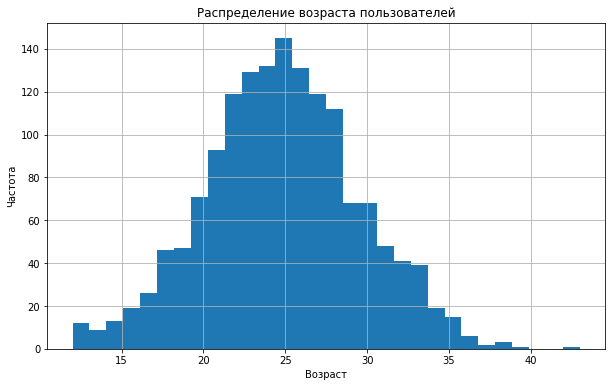

In [20]:
ages.plot(
    kind = 'hist',
    bins = 30,
    figsize = (10,6),
    title = 'Распределение возраста пользователей',
    #xlabel = 'Возраст',
    grid = True
)
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

Видно, что среднее значение возраста не сильно отличается от медианного — 24.9 и 25 соответственно. Возраст пользователей лежит в диапазоне от 13 до 37 лет. Встречается несколько точек выброса, снизу — около 12 лет и сверху — около 40 лет и старше.

### Расстояние, которое пользователь преодолел за одну поездку;

Воспользуемся методом describe() для получения статистики по столбцу distance, который содержит данные о расстоянии.

In [21]:
distances = rides_data['distance']
distances.describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

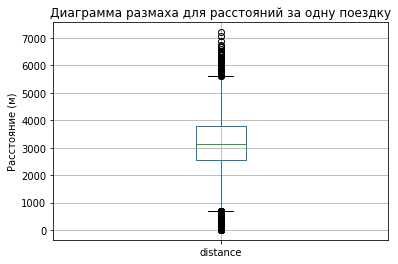

In [22]:
rides_data.boxplot('distance')
plt.title('Диаграмма размаха для расстояний за одну поездку')
plt.ylabel('Расстояние (м)')
plt.show()

Построим гистограмму, чтобы увидеть распределение расстояний, которые проеодолевают пользователи за одну поездку:

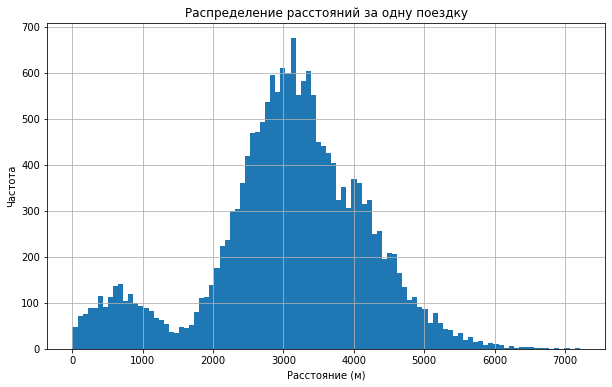

In [23]:
distances.plot(
    kind='hist', 
    bins=100, 
    figsize=(10,6), 
    title='Распределение расстояний за одну поездку',
    #xlabel='Расстояние (м)',
    grid = True
)
plt.xlabel('Расстояние (м)')
plt.ylabel('Частота')
plt.show()

Видно, что среднее растояние, которое преодолевают пользователи за одну поездку около 3000 метров. Основная масса значений сосредоточена в диапазоне от 2500 до 4000 метров — это общая тенденция. Присутствует приличное количество выбросов ниже отметки 900 м. и выше отметки 5600 м. Большое кол-во пользователей совершают поездки длиннее или короче среднего значения.

### Продолжительность поездок.

In [24]:
durations = rides_data['duration']
durations.describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Построим диаграмму размаха:

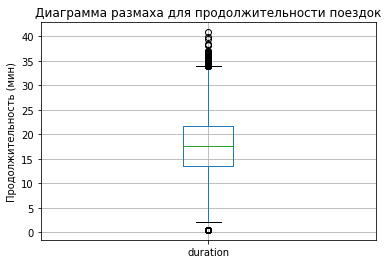

In [25]:
rides_data.boxplot('duration')
plt.title('Диаграмма размаха для продолжительности поездок')
plt.ylabel('Продолжительность (мин)')
plt.show()

Построим гистограмму:

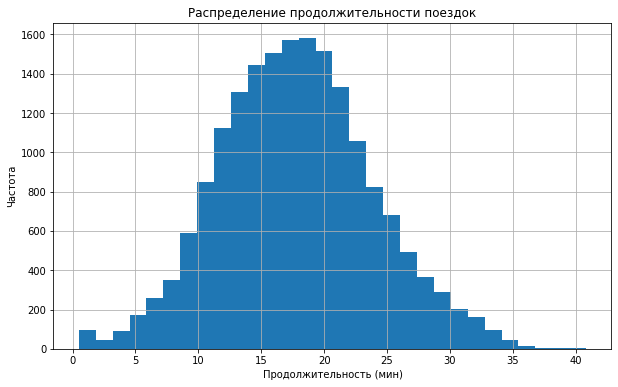

In [26]:
durations.plot(
    kind='hist',
    bins=30,
    figsize=(10, 6),
    title='Распределение продолжительности поездок',
    #xlabel='Продолжительность (мин)',
    grid=True
)
plt.xlabel('Продолжительность (мин)')
plt.ylabel('Частота')
plt.show()

Видно, что средняя (как и медианная) продолжительность поездки составляет около 17 минут. Общая тенденция лежит в диапазоне 10-25 минут. Имеются малое кол-во выбросов снизу — на отметке ниже 2 мин. и приличное кол-во выбросов сверху — выше 34 мин.

<b>Промежуточный итог:</b>
- Чаще всего в данных встречается г. Пятигорск. Москва же находится на последнем месте по частоте встречаемости.
- Количество пользователей без подписки превышает кол-во подписчиков на 5%.
- Средний возраст пользователей 25 лет. Приложением в своей массе пользуются пользователи в возрасте от 13 до 37 лет. Выбросов не много.
- Среднее растояние, которое преодолевают пользователи за одну поездку — около 3000 метров. Основная масса значений сосредоточена в диапазоне от 2500 до 4000 метров — это общая тенденция. Выбросов много, особенно в правом хвосте.
- Средняя продолжительность поездки составляет около 17 минут. Общая тенденция лежит в диапазоне 10-25 минут. Выбросов много в правом хвосте.

## Шаг 4. Объединение данных

### Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуемся методом merge().

Посмотрим исходную размерность датасетов:

In [27]:
print("Размерность users_data:", users_data.shape)
print("Размерность rides_data:", rides_data.shape)
print("Размерность subs_data:", subs_data.shape)

Размерность users_data: (1534, 5)
Размерность rides_data: (18068, 5)
Размерность subs_data: (2, 4)


Для начала объединим users_data и rides_data по столбцу user_id, так как этот столбец является общим для этих двух датафреймов.

In [28]:
merged_data = pd.merge(users_data, rides_data, on='user_id')

Затем добавим данные из subs_data, основываясь на типе подписки subscription_type.

In [29]:
final_data = pd.merge(merged_data, subs_data, on='subscription_type')
final_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


Теперь посмотрим размерность после объединения:

In [30]:
print("Размерность final_data после объединения:", final_data.shape)

Размерность final_data после объединения: (18068, 12)


И проверим на пропуски и дубликаты объединенный датасет:

In [31]:
print("Количество пропусков в final_data:", final_data.isnull().sum())
print("Количество дубликатов в final_data:", final_data.duplicated().sum())

Количество пропусков в final_data: user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64
Количество дубликатов в final_data: 0


Вот что у нас получилось

Как видим, объединение действительно прошло корректно

### Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

Чтобы это реализовать будем использовать фильтрацию по столбцу subscription_type.

In [32]:
free_users_data = final_data[final_data['subscription_type'] == 'free']
free_users_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


In [33]:
ultra_users_data = final_data[final_data['subscription_type'] == 'ultra']
ultra_users_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

<b>Распределение расстояний для пользователей без подписки:

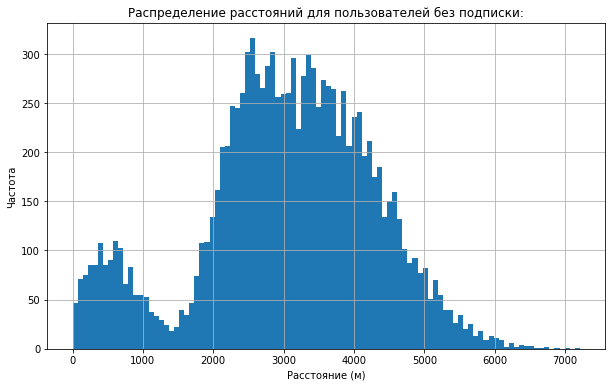

In [34]:
free_users_data['distance'].plot(
    kind = 'hist',
    bins = 100,
    figsize = (10,6),
    grid = True,
    title = 'Распределение расстояний для пользователей без подписки:'
)
plt.xlabel('Расстояние (м)')
plt.ylabel('Частота')
plt.show()

Видно, что большинство пользователей преодолевает расстояния от 2000 до 5000 метров за одну поездку. Можно выделить несколько пиков — 2500 м и 3500 м. Видно резкий всплеск значений до 1000м. Имеется правый хвост, что говорит о наличии очень длинных растояний.

<b>Распределение расстояний для пользователей c подпиской:

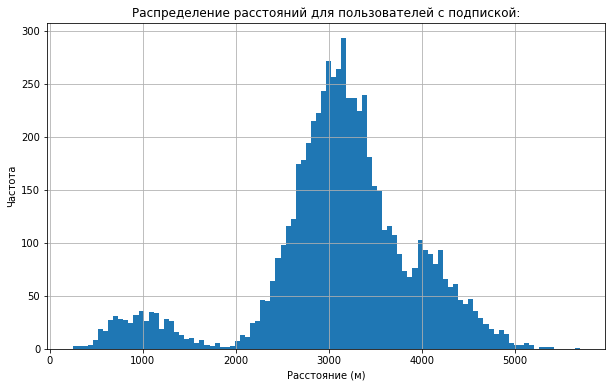

In [35]:
ultra_users_data['distance'].plot(
    kind = 'hist',
    bins = 100,
    figsize = (10,6),
    grid = True,
    title = 'Распределение расстояний для пользователей c подпиской:'
)
plt.xlabel('Расстояние (м)')
plt.ylabel('Частота')
plt.show()

Распределение расстояний сосредоточено в пределах 2500-4000 метров. Пик на этом графике один и явный, в отличие от предыдущего, на отметке около 3000 метров. Имеется резкий всплеск значений около 1000м. Также видно, что отсутствуют такие дальние расстояния, как у пользователей без подписки.

<b>Диаграмма размаха для расстояний пользователей без подписки

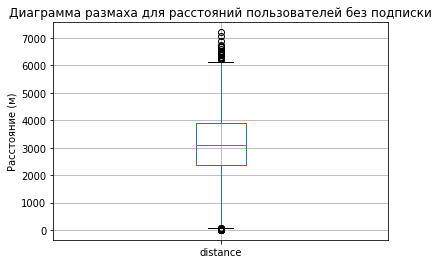

In [36]:
free_users_data.boxplot('distance')
plt.title('Диаграмма размаха для расстояний пользователей без подписки')
plt.ylabel('Расстояние (м)')
plt.show()

Видно, что у пользователей без подписки есть несколько выбросов на больших расстояниях, что может говорить о том, что некоторые из них совершают редкие, но очень длинные поездки.

<b>Диаграмма размаха для расстояний пользователей с подпиской

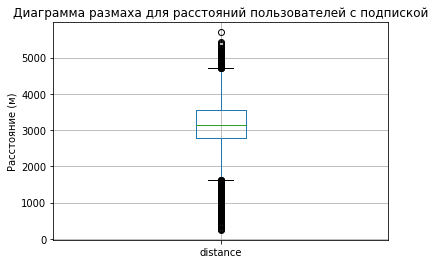

In [37]:
ultra_users_data.boxplot('distance')
plt.title('Диаграмма размаха для расстояний пользователей с подпиской')
plt.ylabel('Расстояние (м)')
plt.show()

У пользователей с подпиской диаграмма размаха также демонстрирует наличие выбросов, но они расположены и в нижней части диапазона, что указывает на наличие довольно коротких поездок.

<b>Распределение времени поездок для пользователей без подписки

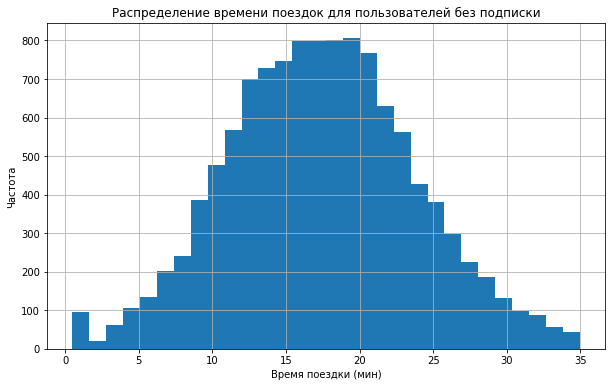

In [38]:
free_users_data['duration'].plot(
    kind = 'hist',
    bins = 30,
    figsize = (10,6),
    grid = True,
    title = 'Распределение времени поездок для пользователей без подписки'
)
plt.xlabel('Время поездки (мин)')
plt.ylabel('Частота')
plt.show()

График имеет почти равномерное распределение с пиком около 20 мин. Большинство поездок занимает от 10 до 25 минут.

<b>Распределение времени поездок для пользователей с подпиской

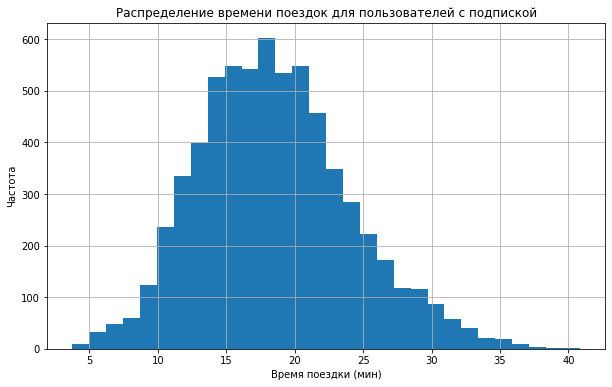

In [39]:
ultra_users_data['duration'].plot(
    kind = 'hist',
    bins = 30,
    figsize = (10,6),
    grid = True,
    title = 'Распределение времени поездок для пользователей с подпиской'
)
plt.xlabel('Время поездки (мин)')
plt.ylabel('Частота')
plt.show()

Здесь же видно, что распределение немного концентрированое с пиком около 18 минут. Также видно длинный правый хвост, который говорит нам о наличии выбросов.

<b>Диаграмма размаха для времени поездок пользователей без подписки

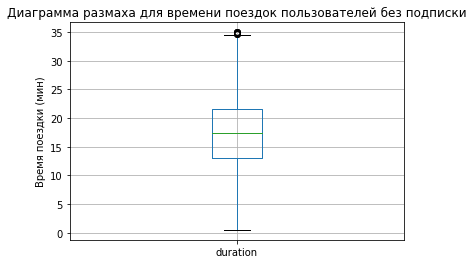

In [40]:
free_users_data.boxplot('duration')
plt.title('Диаграмма размаха для времени поездок пользователей без подписки')
plt.ylabel('Время поездки (мин)')
plt.show()

<b>Диаграмма размаха для времени поездок пользователей с подпиской

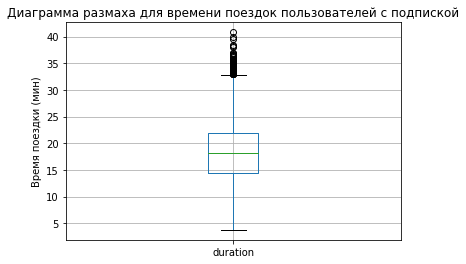

In [41]:
ultra_users_data.boxplot('duration')
plt.title('Диаграмма размаха для времени поездок пользователей с подпиской')
plt.ylabel('Время поездки (мин)')
plt.show()

Диаграммы размаха для обеих групп показывают, что время поездок и расстояния имеют выбросы. Но пользователи с подпиской имеют больше выбросов в сторону долгих поездок.

<b>Совместим графики распределений для более наглядного сравнения

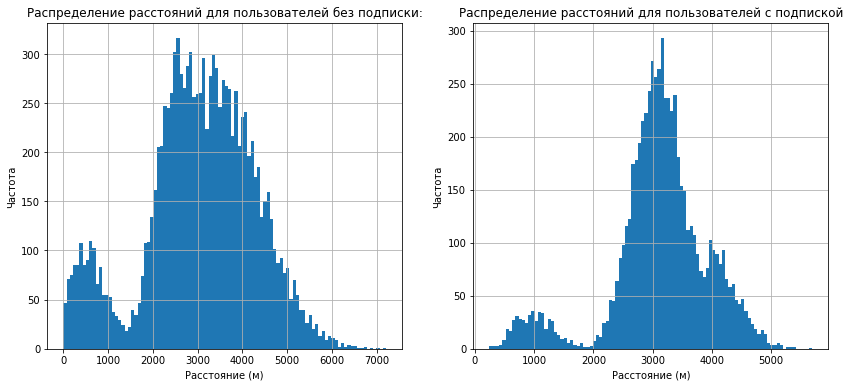

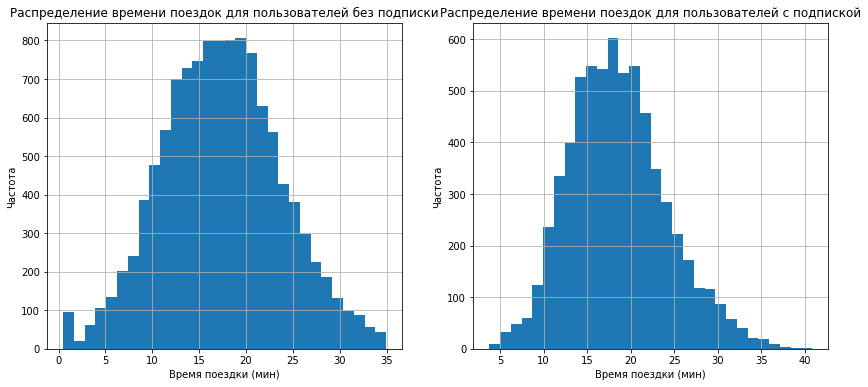

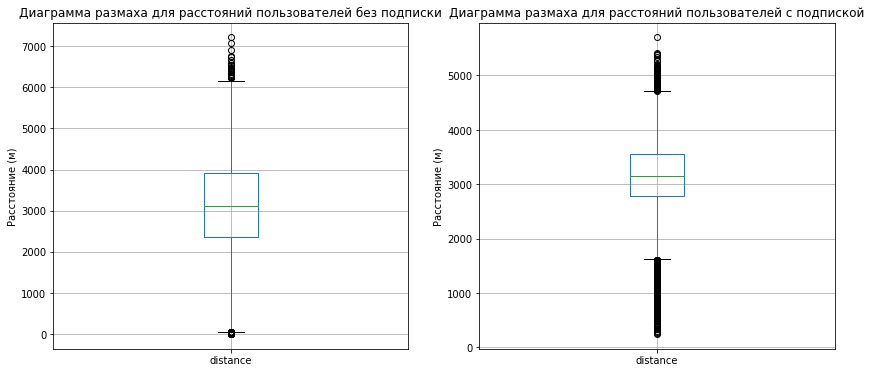

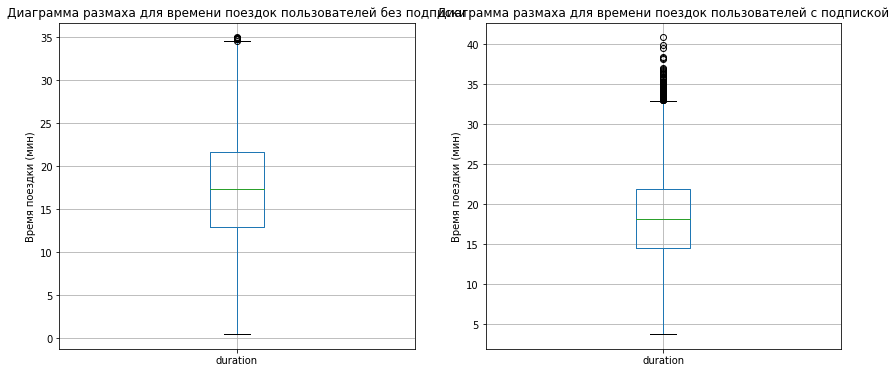

In [42]:
# Визуализация расстояний для пользователей без подписки
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
free_users_data['distance'].plot(
    kind = 'hist',
    bins = 100,
    grid = True,
    title = 'Распределение расстояний для пользователей без подписки:'
)
plt.xlabel('Расстояние (м)')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
ultra_users_data['distance'].plot(
    kind = 'hist', 
    bins = 100,
    grid = True,
    title = 'Распределение расстояний для пользователей с подпиской'

)
plt.xlabel('Расстояние (м)')
plt.ylabel('Частота')

plt.show()

# Визуализация времени поездок для пользователей без подписки и с подпиской
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
free_users_data['duration'].plot(
    kind = 'hist', 
    bins = 30,
    grid = True,
    title = 'Распределение времени поездок для пользователей без подписки'
)
plt.xlabel('Время поездки (мин)')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
ultra_users_data['duration'].plot(
    kind = 'hist',
    bins = 30, 
    grid = True,
    title = 'Распределение времени поездок для пользователей с подпиской'
)
plt.xlabel('Время поездки (мин)')
plt.ylabel('Частота')

plt.show()

# Построение боксплотов для расстояния
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
free_users_data.boxplot('distance')
plt.title('Диаграмма размаха для расстояний пользователей без подписки')
plt.ylabel('Расстояние (м)')

plt.subplot(1, 2, 2)
ultra_users_data.boxplot('distance')
plt.title('Диаграмма размаха для расстояний пользователей с подпиской')
plt.ylabel('Расстояние (м)')

plt.show()

# Построение боксплотов для времени поездки
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
free_users_data.boxplot('duration')
plt.title('Диаграмма размаха для времени поездок пользователей без подписки')
plt.ylabel('Время поездки (мин)')

plt.subplot(1, 2, 2)
ultra_users_data.boxplot('duration')
plt.title('Диаграмма размаха для времени поездок пользователей с подпиской')
plt.ylabel('Время поездки (мин)')

plt.show()

<b>Промежуточный итог:</b>
- Мы объединили датафреймы, и на их основе создали два датафрейма, которые отображают пользователей с подпиской и без. Визуализируя распределение расстояний и времени поездок мы выяснили, что пользователи без подписки, вероятно, реже используют сервис, но совершают более длинные поездки, в то время как пользователи с подпиской используют сервис чаще, но их поездки в среднем короче и регулярнее.

## Шаг 5. Подсчёт выручки

### Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [43]:
aggregated_data = final_data.groupby(['user_id', 'month']).agg({
    'distance': 'sum',        # Суммарное расстояние
    'duration': 'sum',        # Суммарное время поездок
    'user_id': 'count'        # Количество поездок (считаем количество записей для каждого пользователя за каждый месяц)
}).rename(columns={'user_id': 'trip_count'}) # Переименуем колонку с количеством поездок
aggregated_data.head()

distance   duration  trip_count
user_id month                                    
1       1      7027.511294  41.416640           2
        4       754.159807   6.232113           1
        8      6723.470560  44.776802           2
        10     5809.911100  31.578017           2
        11     7003.499363  53.397424           3

### В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.

In [44]:
final_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


<b>Округляем продолжительность поездок до следующего целого числа

In [45]:
final_data['duration'] = np.ceil(final_data['duration'])
final_data['duration'].head()

0    26.0
1    16.0
2     7.0
3    19.0
4    27.0
Name: duration, dtype: float64

<b>Рассчитываем стоимость каждой поездки:

In [46]:
final_data['revenue'] = final_data['start_ride_price'] + final_data['duration'] * final_data['minute_price']
final_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee,revenue
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199,156.0
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199,96.0
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199,42.0
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199,114.0
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199,162.0


<b>К нашему аггрегированному датафрейму добавим помесячную выручку:

In [47]:
aggregated_data = final_data.groupby(['user_id', 'month']).agg({
    'distance': 'sum',        # Суммарное расстояние
    'duration': 'sum',        # Суммарное время поездок
    'revenue': 'sum',         # Помесячная выручка
    'user_id': 'count'        # Количество поездок (считаем количество записей для каждого пользователя за каждый месяц)
}).rename(columns={'user_id': 'trip_count'}) # Переименуем колонку с количеством поездок

# Добавляем стоимость подписки к месячной выручке
aggregated_data = aggregated_data.merge(
    final_data[['user_id', 'month', 'subscription_fee', 'subscription_type']].drop_duplicates(),
    on=['user_id', 'month'],
    how='left'
)

aggregated_data['revenue'] += aggregated_data['subscription_fee']

aggregated_data.head(15)

,user_id,month,distance,duration,revenue,trip_count,subscription_fee,subscription_type
0,1,1,7027.511294,42.0,451.0,2,199,ultra
1,1,4,754.159807,7.0,241.0,1,199,ultra
2,1,8,6723.470560,46.0,475.0,2,199,ultra
3,1,10,5809.911100,32.0,391.0,2,199,ultra
4,1,11,7003.499363,56.0,535.0,3,199,ultra
5,1,12,6751.629942,28.0,367.0,2,199,ultra
6,2,3,10187.723006,63.0,577.0,3,199,ultra
7,2,4,6164.381824,40.0,439.0,2,199,ultra
8,2,6,3255.338202,14.0,283.0,1,199,ultra
9,2,7,6780.722964,48.0,487.0,2,199,ultra


<b>Промежуточный итог:</b>
- Мы создали новый датафрейм, с подсчитанной помесячной выручкой.

## Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Проведем t-тест для независимых выборок.
- <b>Нулевая гипотеза:</b> Пользователи с подпиской тратят столько же времени на поездки, как пользователи без подписки (или не больше).<br>
- <b>Альтернативная гипотеза:</b> Пользователи с подпиской тратят больше времени на поездки.

In [48]:
# Подготовим данные, разделим данные на две группы — для пользователей с подпиской и без подписки.
ultra_users_durations = final_data[final_data['subscription_type'] == 'ultra']['duration']
free_users_durations = final_data[final_data['subscription_type'] == 'free']['duration']

alpha = 0.05 # назначим уровень стат. значимости

results = st.ttest_ind(ultra_users_durations, free_users_durations, alternative='greater') # пользователи с подпиской тратят больше времени на поездки?

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('He получилось отвергнуть нулевую гипотезу')

p-value: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


Выходит, мы не можем утверждать, что пользователи с подпиской действительно тратят больше времени на поездки, чем пользователи без подписки. Возможно, пользователи с подпиской не обязательно являются более «выгодными» для компании с точки зрения времени, проводимого в поездках.

### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

- <b>Нулевая гипотеза:</b> Подписчики в среднем проезжают расстояние не больше оптимального (или такое же расстояние).<br>
- <b>Альтернативная гипотеза:</b> Подписчики в среднем проезжают расстояние больше оптимального.

In [49]:
ultra_distances = ultra_users_data['distance'] # данные для пользователей с подпиской
optimal_distance = 3130

alpha = 0.05 # назначим уровень стат. значимости

result = st.ttest_1samp(ultra_distances, optimal_distance, alternative='greater') # cреднее расстояние пользователей с подпиской не превышает 3130 м.?

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


In [50]:
optimal_distance = 3130

results = st.ttest_1samp(final_data[final_data['subscription_type'] == 'ultra']['distance'], optimal_distance, alternative='greater')

print('p-value', results.pvalue)

if results.pvalue < alpha:
    print("Принимаем альтернативную гипотезу")
else:
    print("Опровергнуть нулевую гипотезу нельзя")

p-value 0.9195368847849785
Опровергнуть нулевую гипотезу нельзя


Выходит, что среднее расстояние пользователей с подпиской не превышает 3130 метров.

### Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

- <b>Нулевая гипотеза:</b> Помесячная выручка от пользователей с подпиской по месяцам будет не выше (или равна), чем выручка от пользователей без подписки.<br>
- <b>Альтернативная гипотеза:</b> Помесячная выручка от пользователей с подпиской по месяцам будет выше, чем выручка от пользователей без подписки.

In [54]:
# Код ревьюера
sample_ultra = aggregated_data.query('subscription_type == "ultra"')['revenue']
sample_free = aggregated_data.query('subscription_type == "free"')['revenue']

alpha = 0.05

results = st.ttest_ind(sample_ultra, sample_free, alternative= 'greater')

print('p-value', results.pvalue)

if (results.pvalue < alpha ):
    print("Принимаем альтернативную гипотезу")
else:
    print("Опровергнуть нулевую гипотезу нельзя")

p-value 1.8850394384715216e-31
Принимаем альтернативную гипотезу


Мы принимаем альтернативную теорию, а значит, помесячная выручка от пользователей с подпиской по месяцам будет выше, чем выручка от пользователей без подписки.

### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Я думаю, что для проверки данной гипотезы подойдет парный тест, ведь мы будем сравнивать две связанные выборки с одним и тем же показателем (кол-во обращений в техподдержку) до и после обновления серверов для одних и тех же пользователей.

Мы будем рассматривать одностороннюю гипотезу, т.к. нас интересует только уменьшение кол-ва обращений.<br>
<b>Гипотезы:<br>
    - Нулевая: Количество обращений в техподдержку после обновления серверов не изменилось.<br>
    - Альтернативная: Количество обращений в техподдержку после обновления серверов уменьшилось.

<b>Промежуточный итог:</b><br>
По результатам проведенных тестов было установлено, что пользователи с подпиской тратят больше времени на поездки, а также что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Эти результаты указывают на то, что подписка оказывает значительное влияние на поведение пользователей, делая их более активными и прибыльными для компании.

# Общий итог

- <b>Предварительная обработка данных:</b> 
    - Данные были целостными и не содержали пропусков, однако были обнаружены дубликаты в информации о пользователях в количестве 31 шт., которые были удалены. Приведены в порядок типы данных, столбец с датой преобразован в нужный формат, добавлен столбец с месяцем. Данные были подготовлены к дальнейшему анализу.
- <b>Анализ пользователей:</b>
    - Чаще всего в данных встречается город Пятигорск, тогда как Москва находится на последнем месте по частоте упоминания.
    - Количество пользователей без подписки оказалось на 5% выше, чем количество подписчиков.
    - Средний возраст пользователей составляет 25 лет, и в основном сервисом пользуются люди в возрасте от 13 до 37 лет. Число выбросов по возрасту минимально.
    - Среднее расстояние, которое преодолевают пользователи за одну поездку, составляет около 3000 метров. Основные значения находятся в диапазоне от 2500 до 4000 метров, но в данных много выбросов, особенно в правом хвосте распределения.
    - Средняя продолжительность поездки составляет около 17 минут, основная масса значений лежит в пределах 10-25 минут. Выбросы также преимущественно сосредоточены в правом хвосте.

- <b>Сравнение пользователей с подпиской и без:</b>
    - После объединения датафреймов и создания отдельных наборов данных для пользователей с подпиской и без, анализ показал, что пользователи без подписки, вероятно, реже используют сервис, но совершают более длинные поездки. В то время как пользователи с подпиской используют сервис чаще, но их поездки в среднем короче и регулярнее.

- <b>Подсчет помесячной выручки: </b>
    - Был создан датафрейм с агрегированными данными о помесячной выручке для каждого пользователя, что позволило оценить вклад пользователей с подпиской и без в общий доход компании.

- <b>Проверка гипотез:</b>
    - По результатам проверки гипотез было установлено, что пользователи с подпиской тратят больше времени на поездки и приносят больше помесячной выручки, чем пользователи без подписки. Эти результаты указывают на то, что подписка оказывает значительное влияние на поведение пользователей, делая их более активными и прибыльными для компании.

- <b>Заключение: </b>
    - Проведенный анализ и проверка гипотез выявили различия в поведении пользователей с подпиской и без неё. Выяснилось, что подписка не только повышает активность пользователей, но и увеличивает их вклад в общую выручку сервиса.